In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import glob

In [4]:
glob.glob(r'C:\Users\piyush\Desktop\Raw_files\individual_stocks_5yr/*csv') ## First paste the location where the files are stored then specify the format you want o search for using(/*format_name)


['C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ADP_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\ADSK_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individ

In [5]:
len(glob.glob(r'C:\Users\piyush\Desktop\Raw_files\individual_stocks_5yr/*csv'))

505

In [6]:
company_list=['C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AAPL_data.csv',
              'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AMGN_data.csv',
              'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\GOOGL_data.csv',
              'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\MSFT_data.csv']


In [7]:
all_data=pd.DataFrame()

for file in company_list:
    current_df=pd.read_csv(file)
    all_data=current_df.append(all_data , ignore_index=True)
    

In [8]:
all_data.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [9]:
all_data['Name'].unique()

array(['MSFT', 'GOOGL', 'AMGN', 'AAPL'], dtype=object)

## What was the change in prices of stock overtime

In [10]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [12]:
## date can't have object data type

In [13]:
all_data['date']=pd.to_datetime(all_data['date'])

In [14]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [15]:
tech_list=all_data['Name'].unique()

In [16]:
tech_list

array(['MSFT', 'GOOGL', 'AMGN', 'AAPL'], dtype=object)

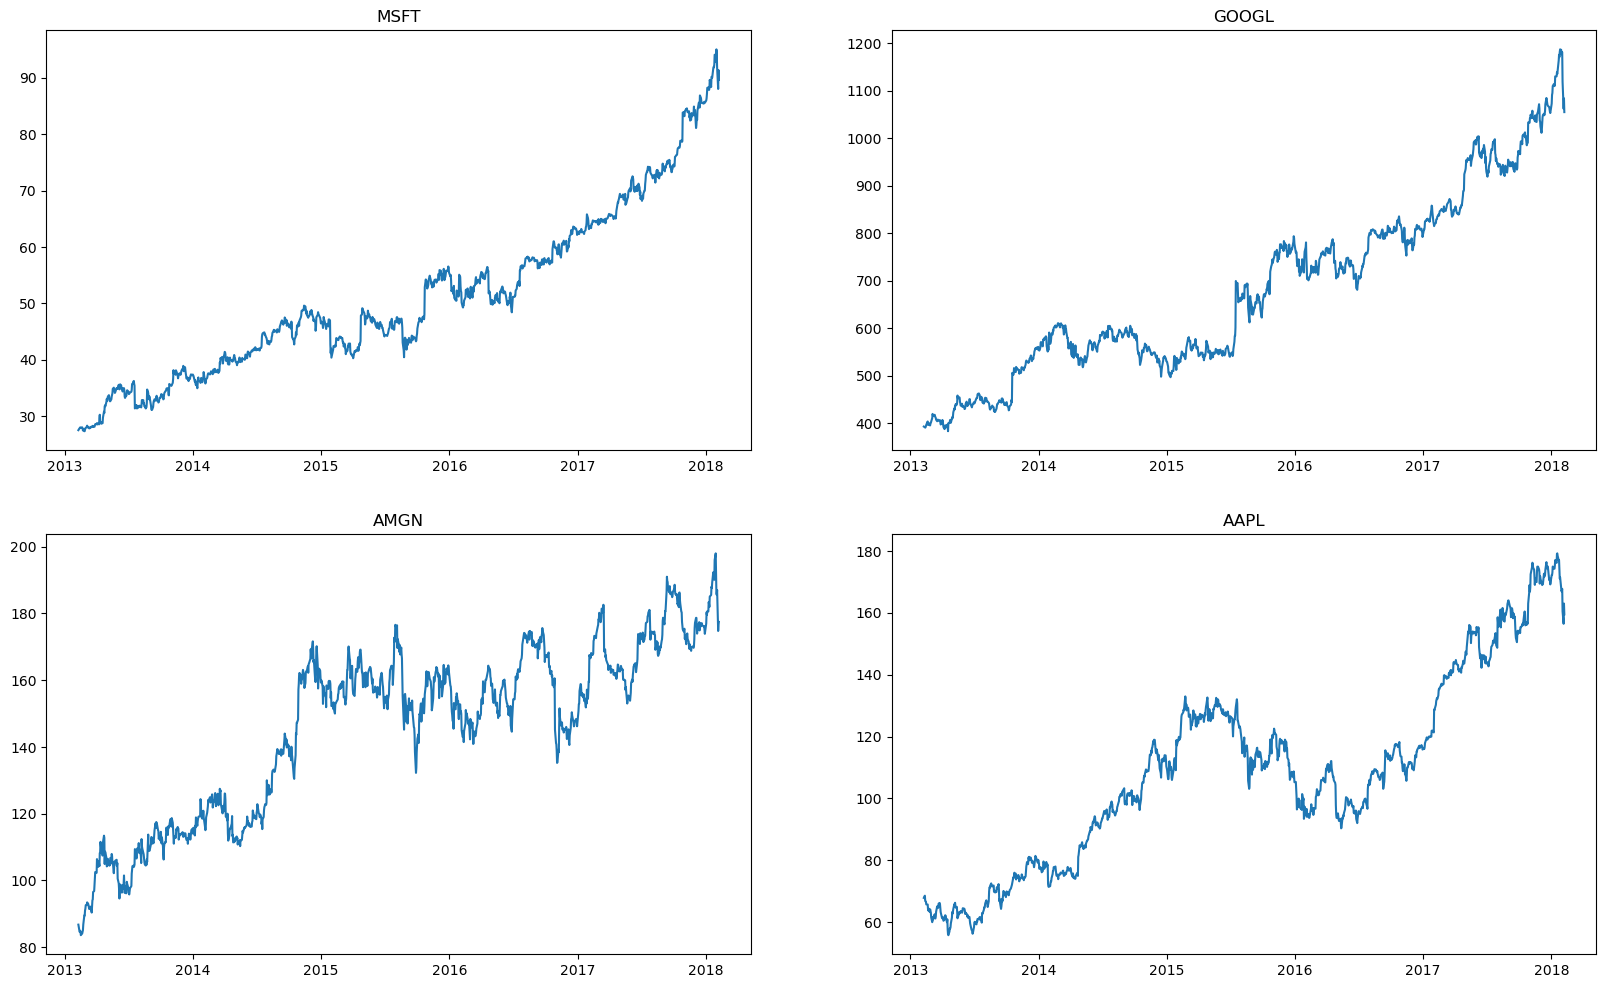

In [17]:
plt.figure(figsize=(20,12))

for index,company in enumerate(tech_list,1):
    
    plt.subplot(2,2,index)
    filter1=all_data['Name']==company
    df=all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)
    

## What was the moving average of the various stocks

### moving Average:- avg change in data over a special interval

In [18]:
all_data['close'].rolling(window=10).mean().head(15)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
Name: close, dtype: float64

In [19]:
new_data=all_data.copy()

In [20]:
ma_day=[10,20,50]
for ma in ma_day:
    new_data['close_'+str(ma)]=new_data['close'].rolling(ma).mean()

In [21]:
new_data.tail(10)

date     open      high       low   close    volume  Name  \
5026 2018-01-25  174.505  174.9500  170.5300  171.11  41529004  AAPL   
5027 2018-01-26  172.000  172.0000  170.0600  171.51  39143011  AAPL   
5028 2018-01-29  170.160  170.1600  167.0700  167.96  50640406  AAPL   
5029 2018-01-30  165.525  167.3700  164.7000  166.97  46048185  AAPL   
5030 2018-01-31  166.870  168.4417  166.5000  167.43  32478930  AAPL   
5031 2018-02-01  167.165  168.6200  166.7600  167.78  47230787  AAPL   
5032 2018-02-02  166.000  166.8000  160.1000  160.50  86593825  AAPL   
5033 2018-02-05  159.100  163.8800  156.0000  156.49  72738522  AAPL   
5034 2018-02-06  154.830  163.7200  154.0000  163.03  68243838  AAPL   
5035 2018-02-07  163.085  163.4000  159.0685  159.54  51608580  AAPL   

      close_10  close_20  close_50  
5026   176.475  174.5575  173.1050  
5027   176.098  174.6030  173.0558  
5028   175.185  174.4470  172.9882  
5029   174.263  174.3340  172.9460  
5030   173.096  174.0925  172.8726  
5031   171.948  173.8700  172.8252  
5032   170.152  173.2435  172.6356  
5033   168.101  172.3180  172.3026  
5034   166.700  171.7520  172.0640  
5035   165.232  171.0125  171.7554

In [22]:
new_data.set_index('date',inplace=True) ## to use pandas for creating a time series graph first we need to set date as index

In [23]:
new_data

open    high       low   close    volume  Name  close_10  \
date                                                                      
2013-02-08   27.350   27.71   27.3100   27.55  33318306  MSFT       NaN   
2013-02-11   27.650   27.92   27.5000   27.86  32247549  MSFT       NaN   
2013-02-12   27.880   28.00   27.7500   27.88  35990829  MSFT       NaN   
2013-02-13   27.930   28.11   27.8800   28.03  41715530  MSFT       NaN   
2013-02-14   27.920   28.06   27.8700   28.04  32663174  MSFT       NaN   
...             ...     ...       ...     ...       ...   ...       ...   
2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL   171.948   
2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL   170.152   
2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL   168.101   
2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL   166.700   
2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL   165.232   

            close_20  close_50  
date                            
2013-02-08       NaN       NaN  
2013-02-11       NaN       NaN  
2013-02-12       NaN       NaN  
2013-02-13       NaN       NaN  
2013-02-14       NaN       NaN  
...              ...       ...  
2018-02-01  173.8700  172.8252  
2018-02-02  173.2435  172.6356  
2018-02-05  172.3180  172.3026  
2018-02-06  171.7520  172.0640  
2018-02-07  171.0125  171.7554  

[5036 rows x 9 columns]

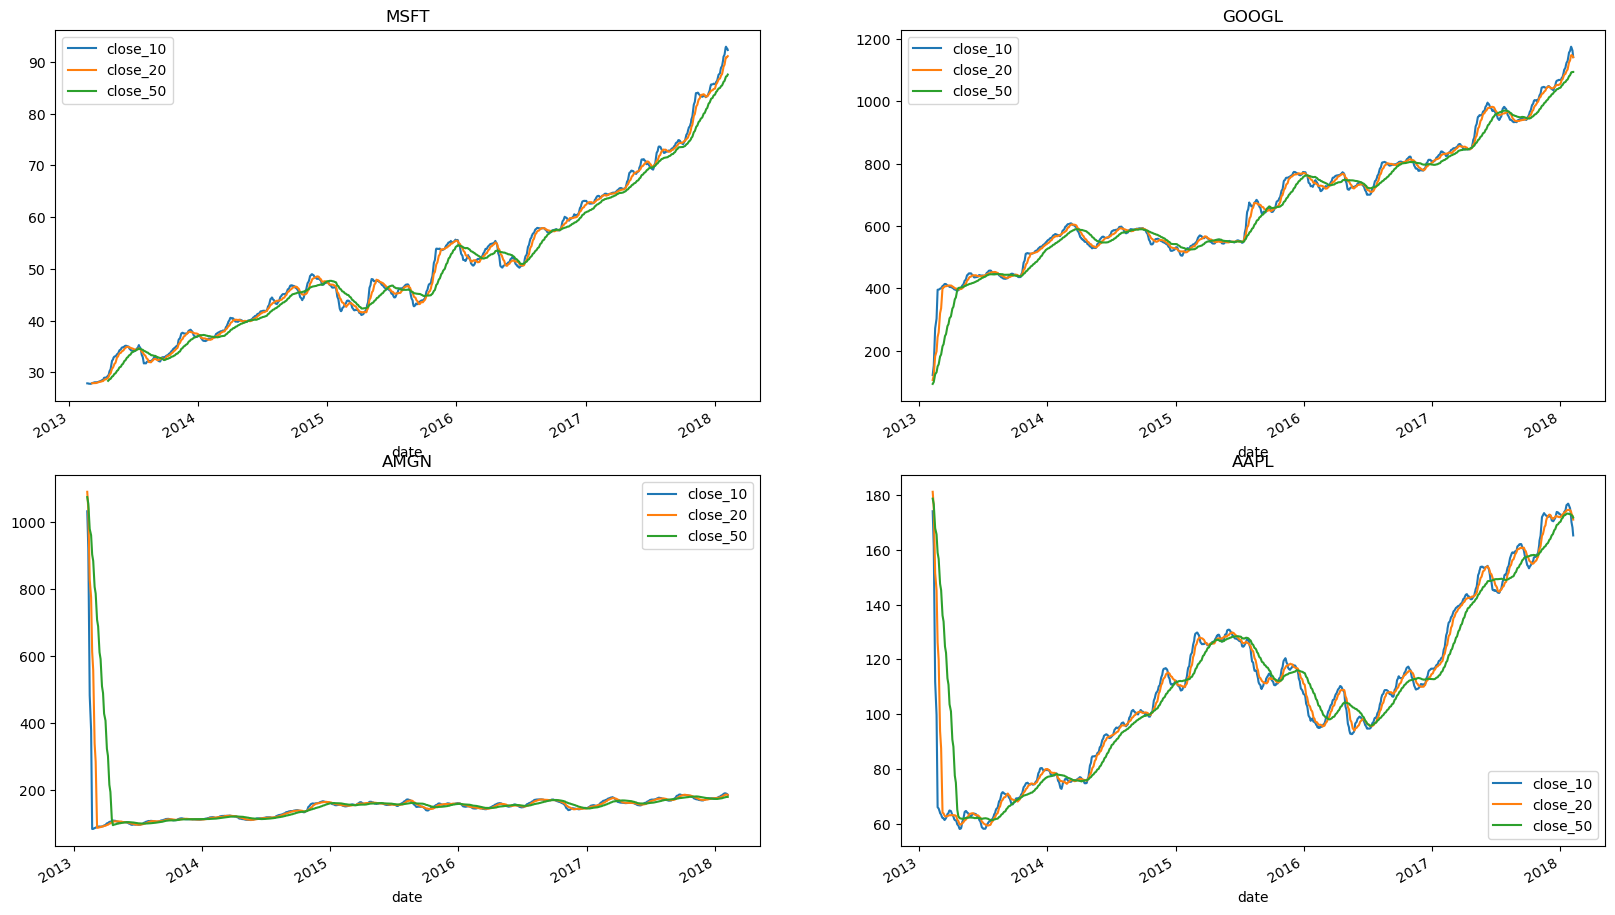

In [24]:
plt.figure(figsize=(20,12))

for index,company in enumerate(tech_list,1):
    
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

## analysing closing price change in apple stock

In [25]:
company_list

['C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AMGN_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\GOOGL_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\MSFT_data.csv']

In [26]:
apple_data=pd.read_csv('C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AAPL_data.csv')

In [27]:
apple_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [28]:
apple_data['Daily return(in %)']=apple_data['close'].pct_change()*100

In [29]:
apple_data.head(4)

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297

In [30]:
import plotly.express as px

In [31]:
px.line(apple_data,x='date',y='Daily return(in %)')

## Performing resampling analysis of closing price..

In [32]:
## for resampling date must be your row index

In [33]:
apple_data.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [34]:
apple_data['date']=pd.to_datetime(apple_data['date'])

In [35]:
apple_data.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [36]:
apple_data.head(5)

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297  
4           -0.089934

In [37]:
apple_data.set_index('date',inplace=True)

In [38]:
apple_data.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            Daily return(in %)  
date                            
2013-02-08                 NaN  
2013-02-11            1.042235  
2013-02-12           -2.506658  
2013-02-13           -0.190297  
2013-02-14           -0.089934

In [39]:
apple_data['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

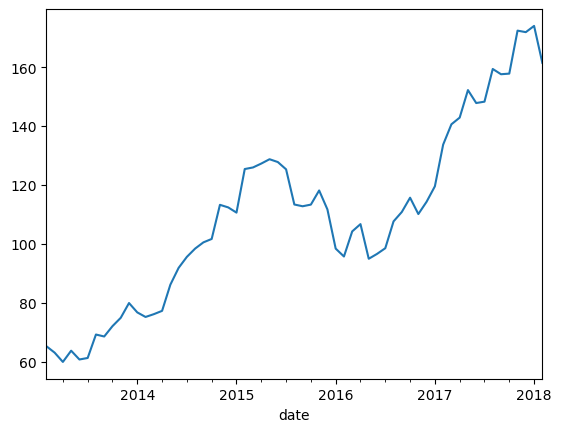

In [40]:
apple_data['close'].resample('M').mean().plot() ## monthly basis

<AxesSubplot:xlabel='date'>

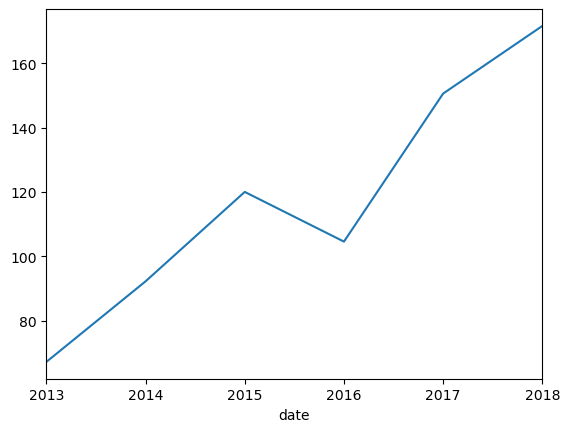

In [41]:
apple_data['close'].resample('Y').mean().plot() ## Yearly basis

<AxesSubplot:xlabel='date'>

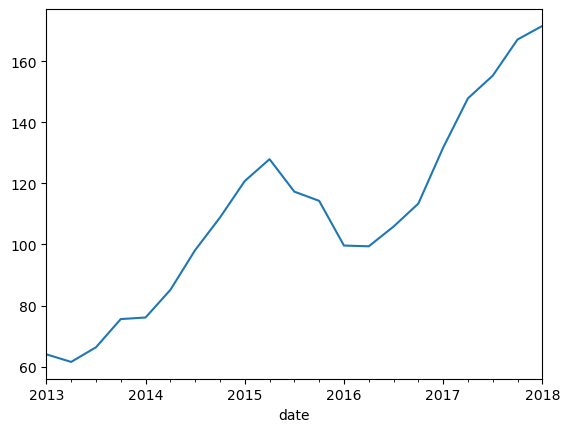

In [42]:
apple_data['close'].resample('Q').mean().plot()

## checking if the closing Prices of these tech companies are correlated or not

In [43]:
company_list

['C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\AMGN_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\GOOGL_data.csv',
 'C:\\Users\\piyush\\Desktop\\Raw_files\\individual_stocks_5yr\\MSFT_data.csv']

In [44]:
apple=pd.read_csv(company_list[0])
amazon=pd.read_csv(company_list[1])
Google=pd.read_csv(company_list[2])
Microsoft=pd.read_csv(company_list[3])

In [45]:
closing_price=pd.DataFrame()

In [46]:
closing_price['apple_close']=apple['close']
closing_price['amazon_close']=amazon['close']
closing_price['google_close']=Google['close']
closing_price['Microsoft_close']=Microsoft['close']

In [47]:
closing_price

apple_close  amazon_close  google_close  Microsoft_close
0         67.8542         86.77      393.0777            27.55
1         68.5614         84.92      391.6012            27.86
2         66.8428         84.54      390.7403            27.88
3         66.7156         84.94      391.8214            28.03
4         66.6556         84.72      394.3039            28.04
...           ...           ...           ...              ...
1254     167.7800        185.56     1181.5900            94.26
1255     160.5000        187.01     1119.2000            91.78
1256     156.4900        174.75     1062.3900            88.00
1257     163.0300        176.65     1084.4300            91.33
1258     159.5400        177.47     1055.4100            89.61

[1259 rows x 4 columns]

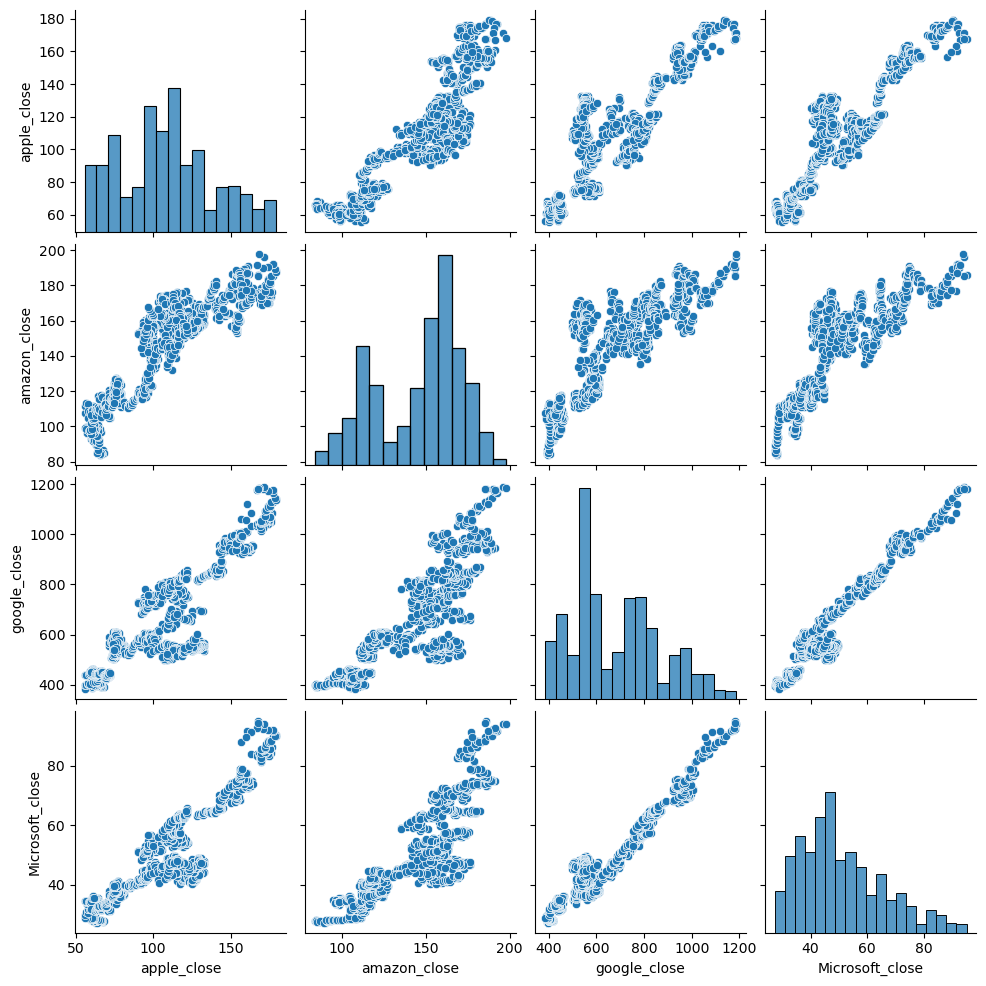

In [48]:
sns.pairplot(closing_price)

In [49]:
closing_price.corr()

apple_close  amazon_close  google_close  Microsoft_close
apple_close         1.000000      0.879580      0.843736         0.899689
amazon_close        0.879580      1.000000      0.785117         0.817059
google_close        0.843736      0.785117      1.000000         0.970779
Microsoft_close     0.899689      0.817059      0.970779         1.000000

<AxesSubplot:>

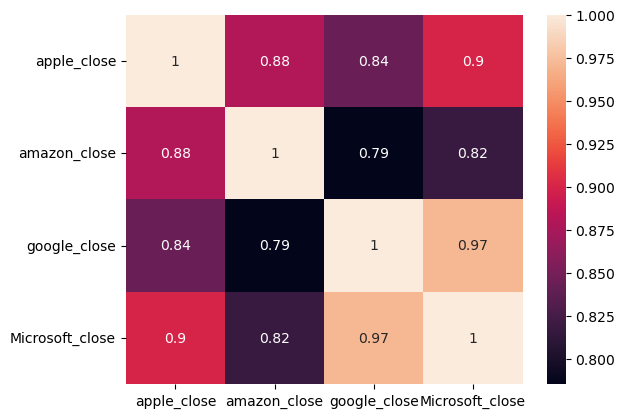

In [50]:
sns.heatmap(closing_price.corr(),annot=True)

##  Closing price of stocks or Daily Returns in stock are co-related or not!!

In [51]:
closing_price

apple_close  amazon_close  google_close  Microsoft_close
0         67.8542         86.77      393.0777            27.55
1         68.5614         84.92      391.6012            27.86
2         66.8428         84.54      390.7403            27.88
3         66.7156         84.94      391.8214            28.03
4         66.6556         84.72      394.3039            28.04
...           ...           ...           ...              ...
1254     167.7800        185.56     1181.5900            94.26
1255     160.5000        187.01     1119.2000            91.78
1256     156.4900        174.75     1062.3900            88.00
1257     163.0300        176.65     1084.4300            91.33
1258     159.5400        177.47     1055.4100            89.61

[1259 rows x 4 columns]

In [52]:
 (closing_price['apple_close']-closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1)

0            NaN
1       0.010422
2      -0.025067
3      -0.001903
4      -0.000899
          ...   
1254    0.002090
1255   -0.043390
1256   -0.024984
1257    0.041792
1258   -0.021407
Name: apple_close, Length: 1259, dtype: float64

In [66]:
for col in closing_price.columns:
     closing_price[col+'Pct_change']=(closing_price[col]-closing_price[col].shift(1))/closing_price['apple_close'].shift(1)*100

In [67]:
closing_price

apple_close  amazon_close  google_close  Microsoft_close  \
0         67.8542         86.77      393.0777            27.55   
1         68.5614         84.92      391.6012            27.86   
2         66.8428         84.54      390.7403            27.88   
3         66.7156         84.94      391.8214            28.03   
4         66.6556         84.72      394.3039            28.04   
...           ...           ...           ...              ...   
1254     167.7800        185.56     1181.5900            94.26   
1255     160.5000        187.01     1119.2000            91.78   
1256     156.4900        174.75     1062.3900            88.00   
1257     163.0300        176.65     1084.4300            91.33   
1258     159.5400        177.47     1055.4100            89.61   

      apple_closePct_change  amazon_closePct_change  google_closePct_change  \
0                       NaN                     NaN                     NaN   
1                  1.042235               -2.726434               -2.175989   
2                 -2.506658               -0.554248               -1.255663   
3                 -0.190297                0.598419                1.617377   
4                 -0.089934               -0.329758                3.721019   
...                     ...                     ...                     ...   
1254               0.209043               -0.292660               -0.376277   
1255              -4.339015                0.864227              -37.185600   
1256              -2.498442               -7.638629              -35.395639   
1257               4.179181                1.214135               14.083967   
1258              -2.140710                0.502975              -17.800405   

      Microsoft_closePct_change  apple_closePct_changePct_change  \
0                           NaN                              NaN   
1                      0.456862                              NaN   
2                      0.029171                        -5.176226   
3                      0.224407                         3.465386   
4                      0.014989                         0.150434   
...                         ...                              ...   
1254                  -0.447948                        -0.039692   
1255                  -1.478126                        -2.710727   
1256                  -2.355140                         1.146774   
1257                   2.127931                         4.267125   
1258                  -1.055021                        -3.876520   

      amazon_closePct_changePct_change  google_closePct_changePct_change  \
0                                  NaN                               NaN   
1                                  NaN                               NaN   
2                             3.168235                          1.342339   
3                             1.724444                          4.298204   
4                            -1.391244                          3.153148   
...                                ...                               ...   
1254                          1.692439                         -1.959619   
1255                          0.689526                        -21.939041   
1256                         -5.297730                          1.115241   
1257                          5.657080                         31.618382   
1258                         -0.436214                        -19.557365   

      Microsoft_closePct_changePct_change  
0                                     NaN  
1                                     NaN  
2                               -0.623807  
3                                0.292083  
4                               -0.313897  
...                                   ...  
1254                            -1.079540  
1255                            -0.614005  
1256                            -0.546426  
1257                             2.864766  
1258                            -1.952372  

[1259

In [71]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'Microsoft_close',
       'apple_closePct_change', 'amazon_closePct_change',
       'google_closePct_change', 'Microsoft_closePct_change',
       'apple_closePct_changePct_change', 'amazon_closePct_changePct_change',
       'google_closePct_changePct_change',
       'Microsoft_closePct_changePct_change'],
      dtype='object')

In [72]:
closing_p=closing_price[['apple_closePct_change', 'amazon_closePct_change',
       'google_closePct_change', 'Microsoft_closePct_change']]

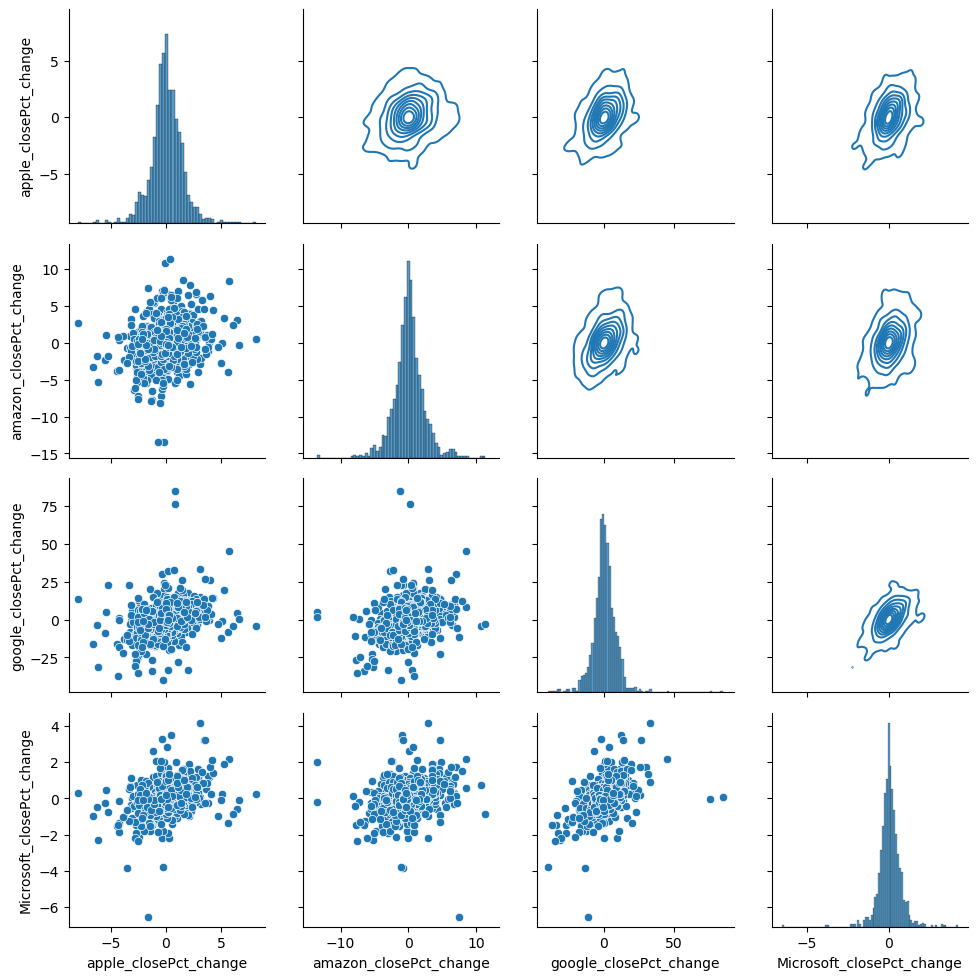

In [73]:
g=sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)



In [74]:
closing_p.corr()

apple_closePct_change  amazon_closePct_change  \
apple_closePct_change                   1.000000                0.256885   
amazon_closePct_change                  0.256885                1.000000   
google_closePct_change                  0.352345                0.366677   
Microsoft_closePct_change               0.360594                0.277962   

                           google_closePct_change  Microsoft_closePct_change  
apple_closePct_change                    0.352345                   0.360594  
amazon_closePct_change                   0.366677                   0.277962  
google_closePct_change                   1.000000                   0.513421  
Microsoft_closePct_change                0.513421                   1.000000